# Import all essential Libraries

In [1]:
#Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Load the dataset

In [2]:
df = pd.read_csv(r"D:\New folder (2)\capston\New folder\E_Commerce.csv")

df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
#check shape of the data
df.shape

(10999, 12)

# Data Pre-processing

In [4]:
#drop the ID column its not useful for us for data analysis
df=df.drop(columns='ID',axis=1)

In [5]:
#check the data types and null/missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [6]:
#check the null values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
#check the duplicates
df.duplicated().sum()

0

In [8]:
#seprate the all catagorical column and check valuecounts of each column for each catogory
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [9]:
#value counts for each catogories column
for column in object_columns:
    print(df[column].value_counts())

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64
Gender
F    5545
M    5454
Name: count, dtype: int64


# Exploratory data analysis

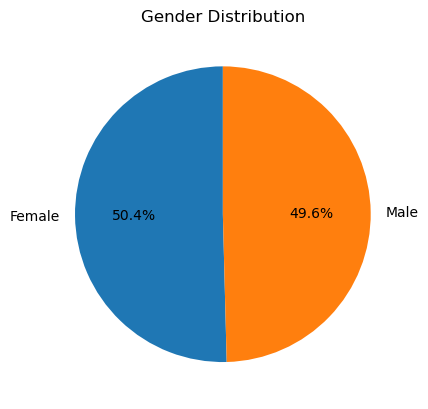

In [10]:
#Customer Gender Prediction
plt.pie(df['Gender'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()
#The dataset has the equal number of both males and female customers, with percentage of 49.6% and 50.4% respectively

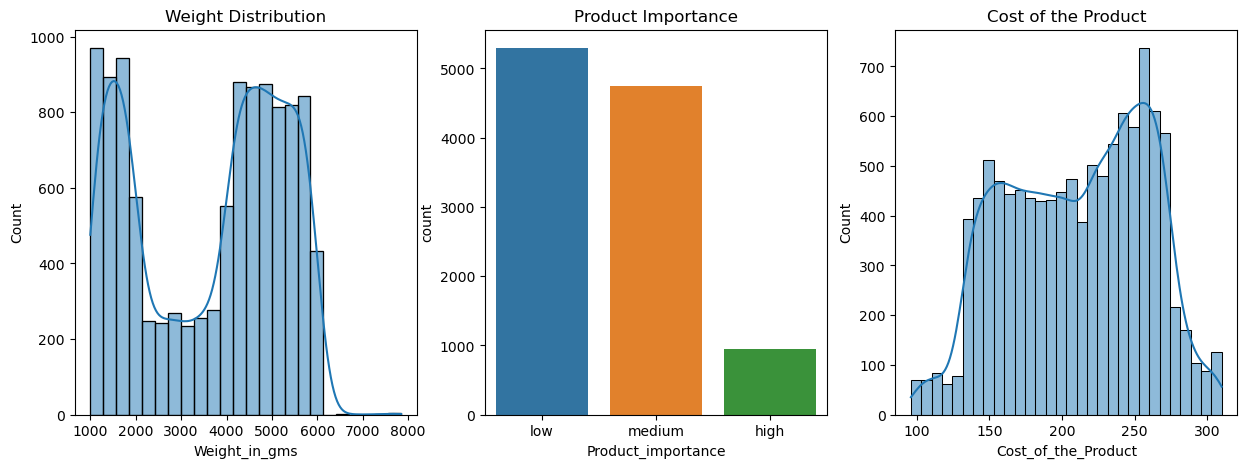

In [11]:
#Product Properties
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')
plt.show()

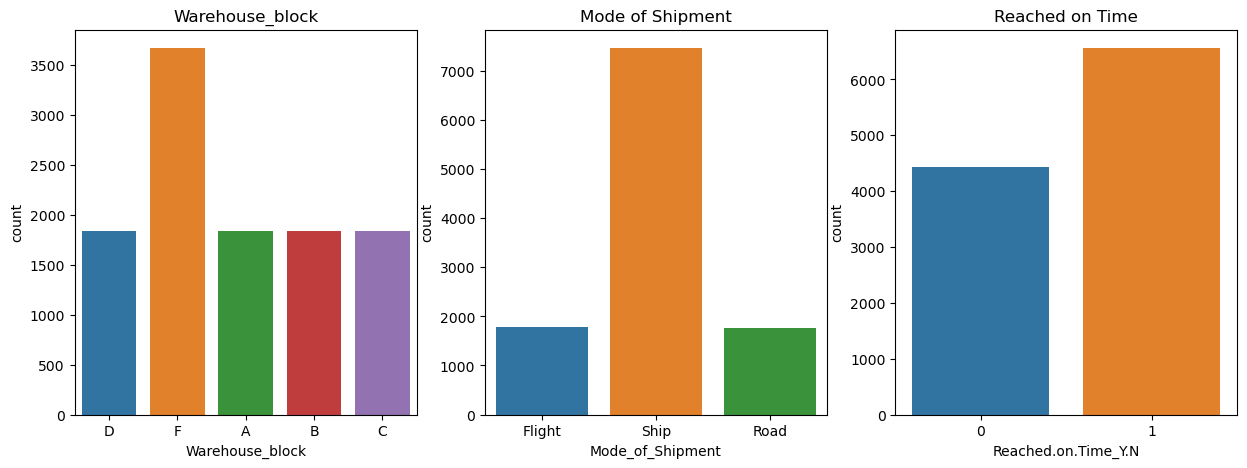

In [12]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse_block')
sns.countplot(x='Mode_of_Shipment',data=df,ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x='Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')
plt.show()

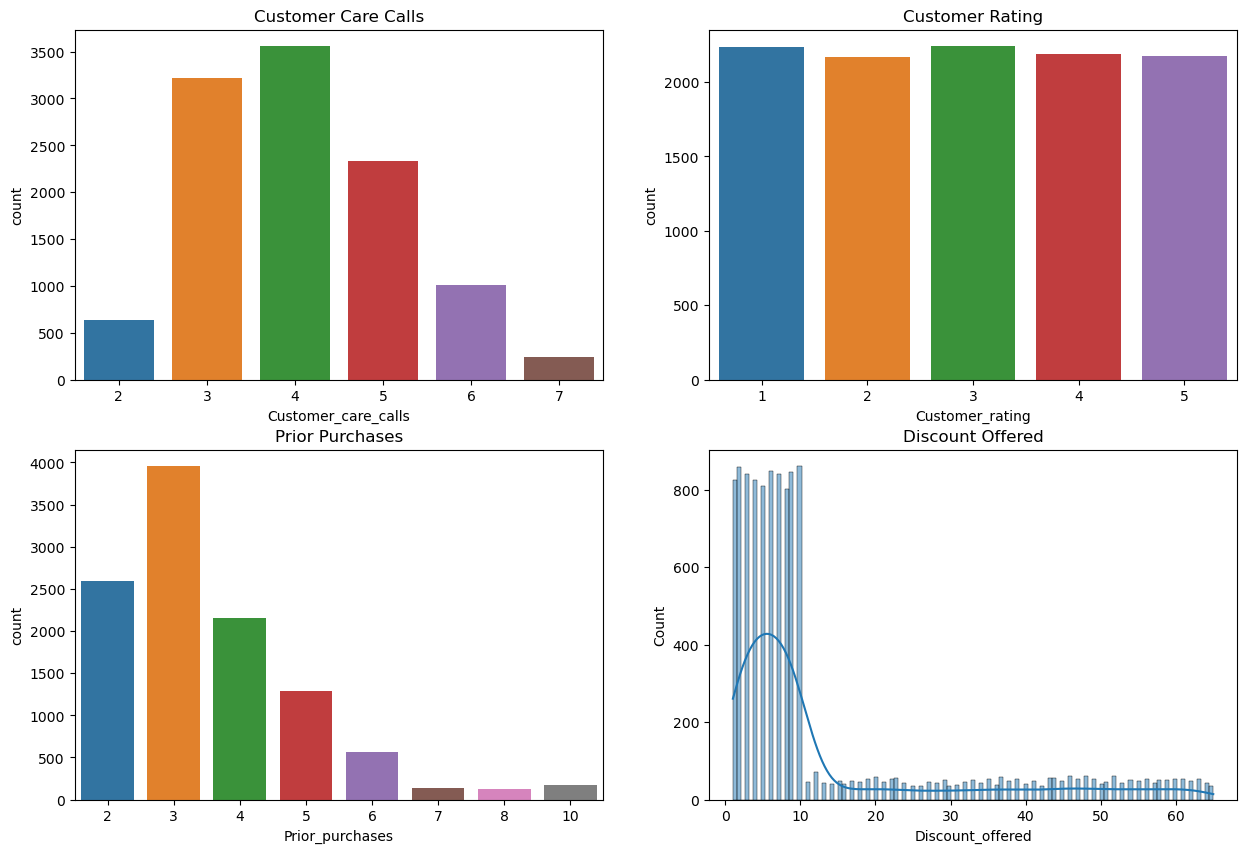

In [13]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')
plt.show()

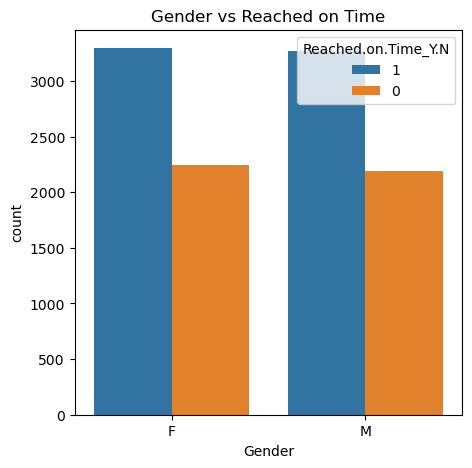

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Reached.on.Time_Y.N' is a string or categorical type
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype(str)

plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=df, hue='Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')
plt.show()


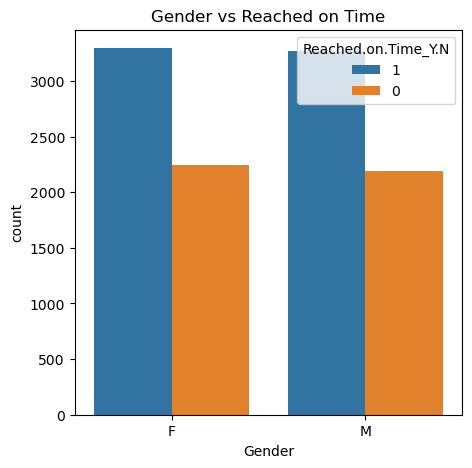

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Gender', data = df,hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')
plt.show()

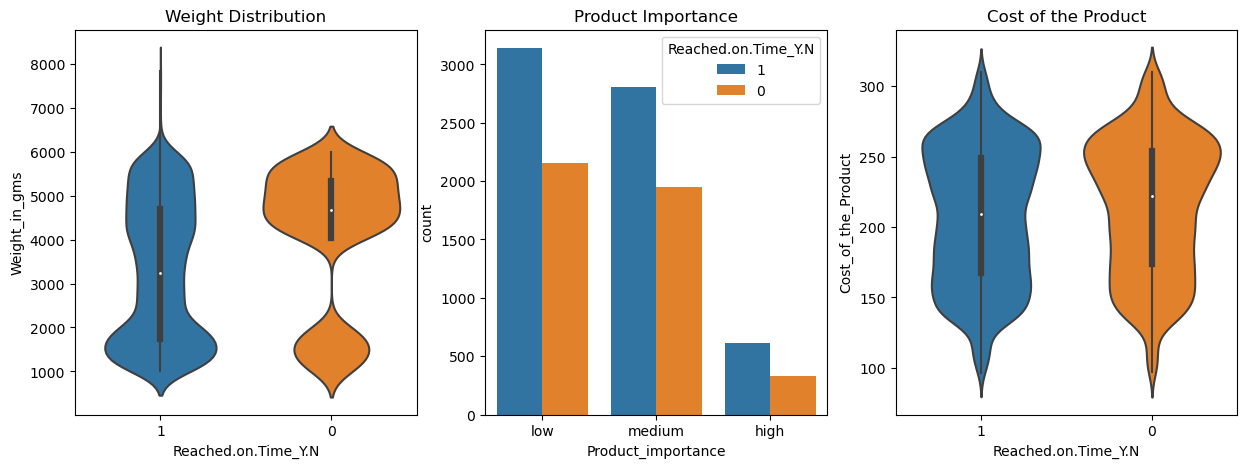

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(y = df['Weight_in_gms'],x = df['Reached.on.Time_Y.N'], ax=ax[0]).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Product Importance')
sns.violinplot(y = df['Cost_of_the_Product'], ax=ax[2],x = df['Reached.on.Time_Y.N']).set_title('Cost of the Product')
plt.show()

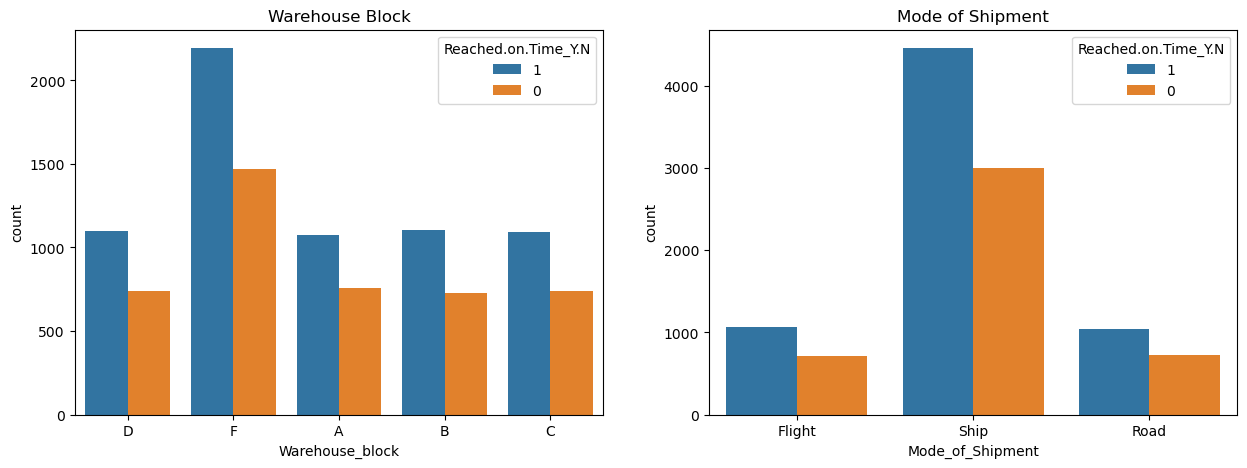

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Reached.on.Time_Y.N' is a string or categorical type
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype(str)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='Warehouse_block', data=df, ax=ax[0], hue='Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x='Mode_of_Shipment', data=df, ax=ax[1], hue='Reached.on.Time_Y.N').set_title('Mode of Shipment')

plt.show()


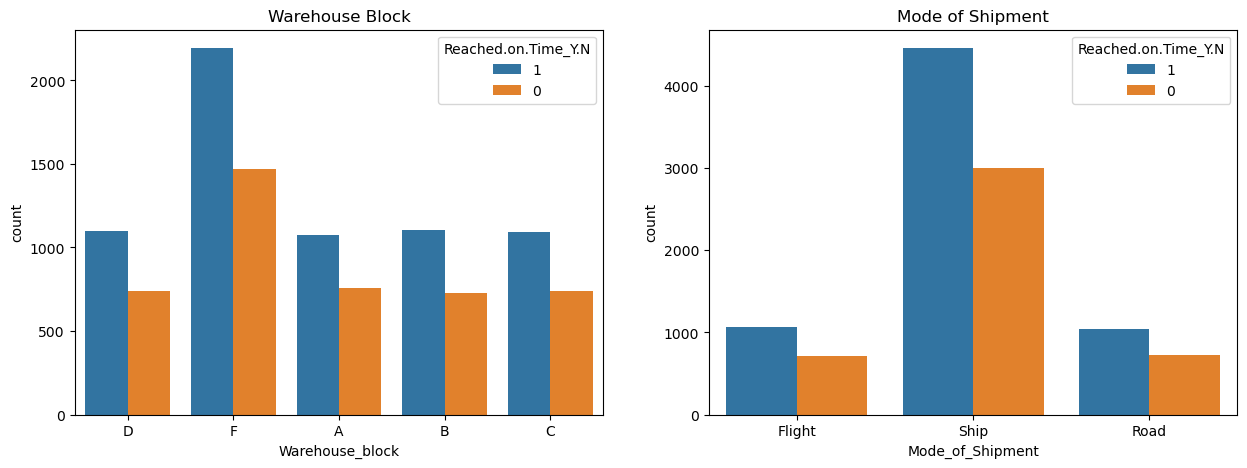

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')
plt.show()

In [19]:
print(df.dtypes)

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N    object
dtype: object


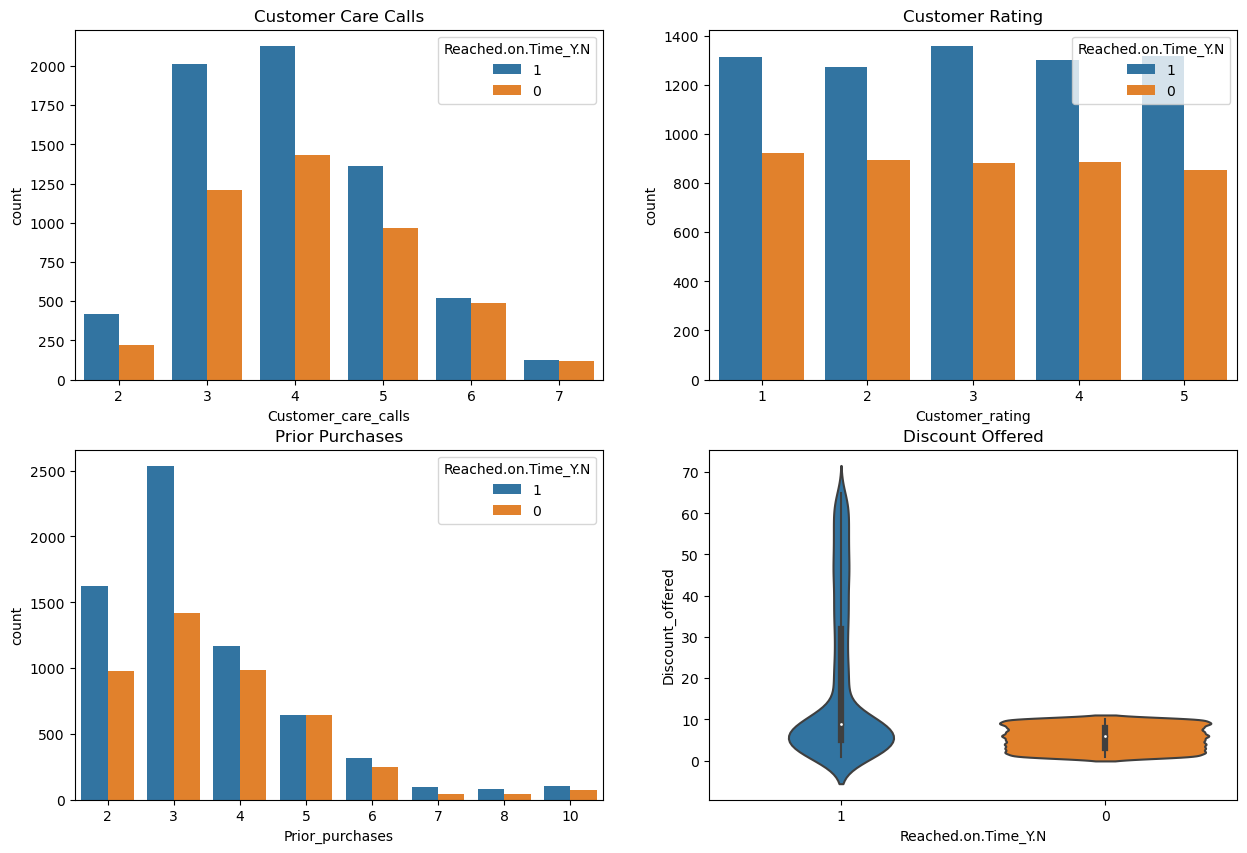

In [20]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')
plt.show()

In [21]:
num_col=df.select_dtypes(include=['int'])

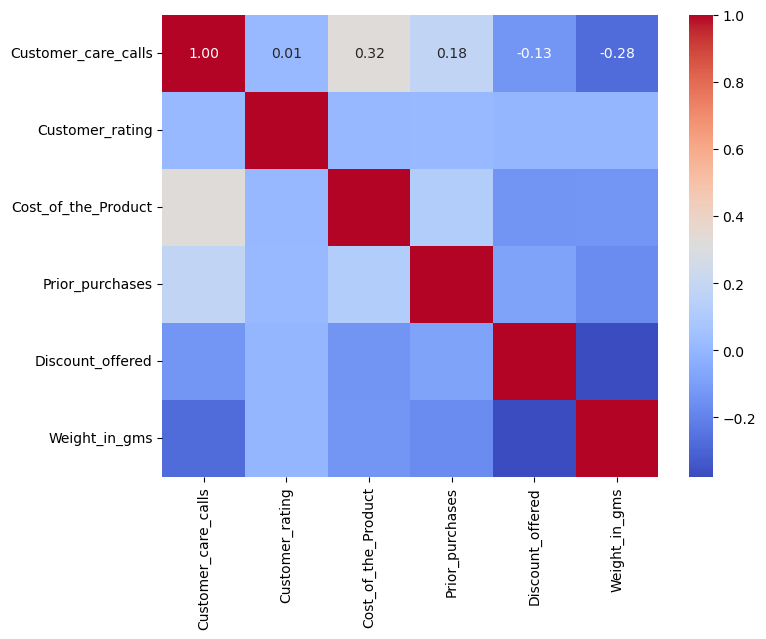

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure num_col has only numerical data
num_col = df.select_dtypes(include=['number'])  

# Create heatmap
plt.figure(figsize=(8,6))  # Adjust figure size if needed
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Save and show the heatmap
plt.savefig('heatmap_output.png', dpi=200, bbox_inches='tight')
plt.show()


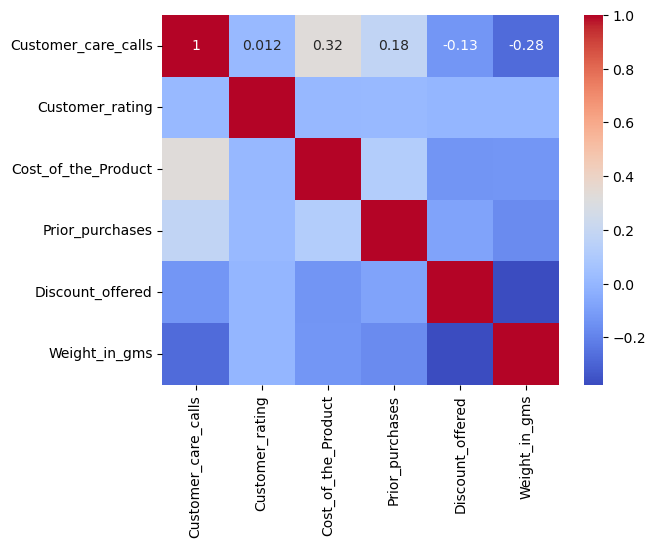

In [23]:
sns.heatmap(num_col.corr(),annot=True,cmap='coolwarm')
plt.savefig('heatmap_output.png', dpi=200, bbox_inches='tight')
plt.show()

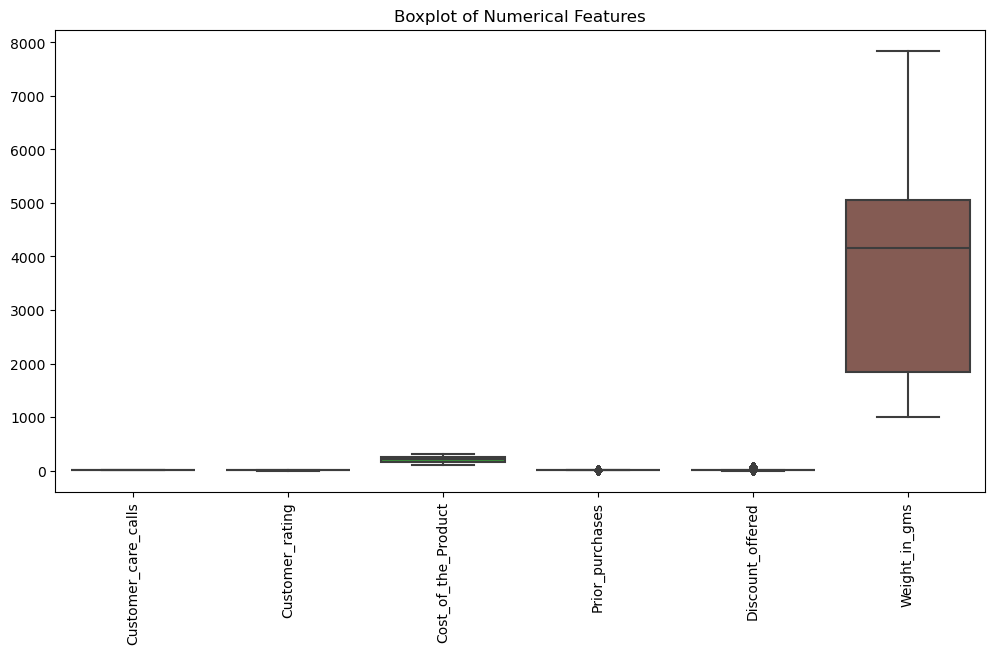

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Reached.on.Time_Y.N"]))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)
plt.show()

# Split the data

In [25]:
X=df.drop('Reached.on.Time_Y.N',axis=1)
y=df['Reached.on.Time_Y.N']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
X_train.shape,X_test.shape

((8799, 10), (2200, 10))

# Transform the data

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [30]:
Transformer=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first'),['Warehouse_block','Mode_of_Shipment','Gender']),
    ('tnf2',OrdinalEncoder(categories=[['low','medium','high']]),['Product_importance']),
],remainder='passthrough')

In [31]:
#column transformation for X_train #use only fit and transform methods
transformed_array = Transformer.fit_transform(X_train)
transformed_array = transformed_array.astype(int)

# Get feature names for one-hot encoded and ordinal columns
ohe_features = Transformer.named_transformers_['tnf1'].get_feature_names_out(['Warehouse_block', 'Mode_of_Shipment', 'Gender'])
ordinal_features = ['Product_importance']  # Name for the ordinal-encoded column
passthrough_features = [col for col in X_train.columns if col not in ['Warehouse_block', 'Mode_of_Shipment', 'Gender', 'Product_importance']]

# Combine all feature names
final_column_names = list(ohe_features) + ordinal_features + passthrough_features

# Convert to DataFrame
X_train_transformed = pd.DataFrame(transformed_array, columns=final_column_names)

# Display the transformed DataFrame
X_train_transformed

,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M,Product_importance,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0,1,0,0,0,1,0,1,6,1,104,4,23,1442
1,1,0,0,0,0,0,0,1,6,1,293,5,7,1052
2,0,0,1,0,0,1,0,1,3,4,257,4,8,4780
3,0,0,0,1,0,1,0,2,3,4,213,3,4,5996
4,0,0,0,1,1,0,0,1,3,2,235,2,9,5116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,0,0,0,1,0,1,1,0,5,3,231,2,8,5743
8795,0,0,1,0,1,0,1,0,4,5,216,2,2,4905
8796,0,0,0,1,1,0,1,1,4,1,161,3,3,4590
8797,0,0,0,1,1,0,1,1,4,3,245,6,2,1727


In [32]:
#column transformation for X_test #use only transform method
transformed_array = Transformer.transform(X_test)
transformed_array = transformed_array.astype(int)

# Get feature names for one-hot encoded and ordinal columns
ohe_features = Transformer.named_transformers_['tnf1'].get_feature_names_out(['Warehouse_block', 'Mode_of_Shipment', 'Gender'])
ordinal_features = ['Product_importance']  # Name for the ordinal-encoded column
passthrough_features = [col for col in X_train.columns if col not in ['Warehouse_block', 'Mode_of_Shipment', 'Gender', 'Product_importance']]

# Combine all feature names
final_column_names = list(ohe_features) + ordinal_features + passthrough_features

# Convert to DataFrame
X_test_transformed = pd.DataFrame(transformed_array, columns=final_column_names)

# Display the transformed DataFrame
X_test_transformed

,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M,Product_importance,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0,0,0,0,0,0,1,1,5,2,240,2,4,4447
1,0,0,0,1,0,0,0,0,6,4,247,4,2,1326
2,0,0,0,1,0,1,1,1,2,1,264,3,10,3409
3,0,0,0,0,0,1,0,1,5,1,201,3,65,2488
4,0,1,0,0,0,0,1,2,2,2,242,3,9,4717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,1,0,0,0,3,3,245,2,4,4719
2196,0,0,0,0,0,1,1,2,3,5,267,2,2,5062
2197,0,0,0,0,0,0,1,0,3,5,265,10,6,4380
2198,1,0,0,0,0,0,1,1,6,1,134,3,10,1278


# Model Building
Using the following models to predict the product delivery: Random Forest Classifier, Decision Tree Classifier, Logistic Regression, K Nearest Neighbors,

# Random Forest

In [33]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [34]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

In [35]:
#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [43]:
#Fitting the model
grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=2)

In [74]:
print('Best parameters: ', grid.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 42}


In [75]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42)

In [76]:
#Fitting the model
rfc.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                       random_state=42)

In [77]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train_transformed, y_train))

Training accuracy:  0.7437208773724286


In [78]:
#predicting the test set results
rfc_pred = rfc.predict(X_test_transformed)
rfc_pred

array(['0', '0', '1', ..., '0', '1', '0'], dtype=object)

In [79]:
from sklearn.metrics import accuracy_score
#Test accuracy
test_accuracy_rfc=print(accuracy_score(y_test, rfc_pred))

0.6831818181818182


# Decision tree

In [80]:
#Decision Tree Classifier Object
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [83]:
#Using GridSearchCV for hyperparameter tuning
#Parameter grid
dt_param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

In [84]:
#GridSearchCV object for decision tree
dt_grid = GridSearchCV(estimator=dtc, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [85]:
#Fitting the model
dt_grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=2)

In [86]:
#Best parameters
print('Best parameters: ', dt_grid.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [87]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8, min_samples_split=2, random_state=0, class_weight='balanced')

In [88]:
#Fitting the model
dtc.fit(X_train_transformed, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=8, random_state=0)

In [89]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train_transformed, y_train))

Training accuracy:  0.6913285600636436


In [90]:
#predicting the test set results
dtc_pred = dtc.predict(X_test_transformed)
dtc_pred

array(['0', '0', '1', ..., '0', '1', '0'], dtype=object)

In [91]:
#Test accuracy
test_accuracy_dtc=print(accuracy_score(y_test, dtc_pred))

0.6836363636363636


# Logistic regression

In [92]:
#Logistic Regression Object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [93]:
lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [94]:
#Training accuracy
lr.score(X_train_transformed, y_train)

0.6357540629617002

In [95]:
#predicting the test set results
lr_pred = lr.predict(X_test_transformed)
lr_pred

array(['0', '0', '1', ..., '0', '1', '1'], dtype=object)

In [96]:
#Test accuracy
test_accuracy_lr=print(accuracy_score(y_test, lr_pred))

0.6295454545454545


# K-Nearest Nabours

In [97]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Classifier Object
knn = KNeighborsClassifier()

In [98]:
#fitting the model
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [99]:
#Training accuracy
knn.score(X_train_transformed, y_train)

0.7792931014888056

In [100]:
#predicting the test set results
knn_pred = lr.predict(X_test_transformed)
knn_pred

array(['0', '0', '1', ..., '0', '1', '1'], dtype=object)

In [101]:
#Test accuracy
test_accuracy_knn=print(accuracy_score(y_test, knn_pred))

0.6295454545454545


# Model Evaluation

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

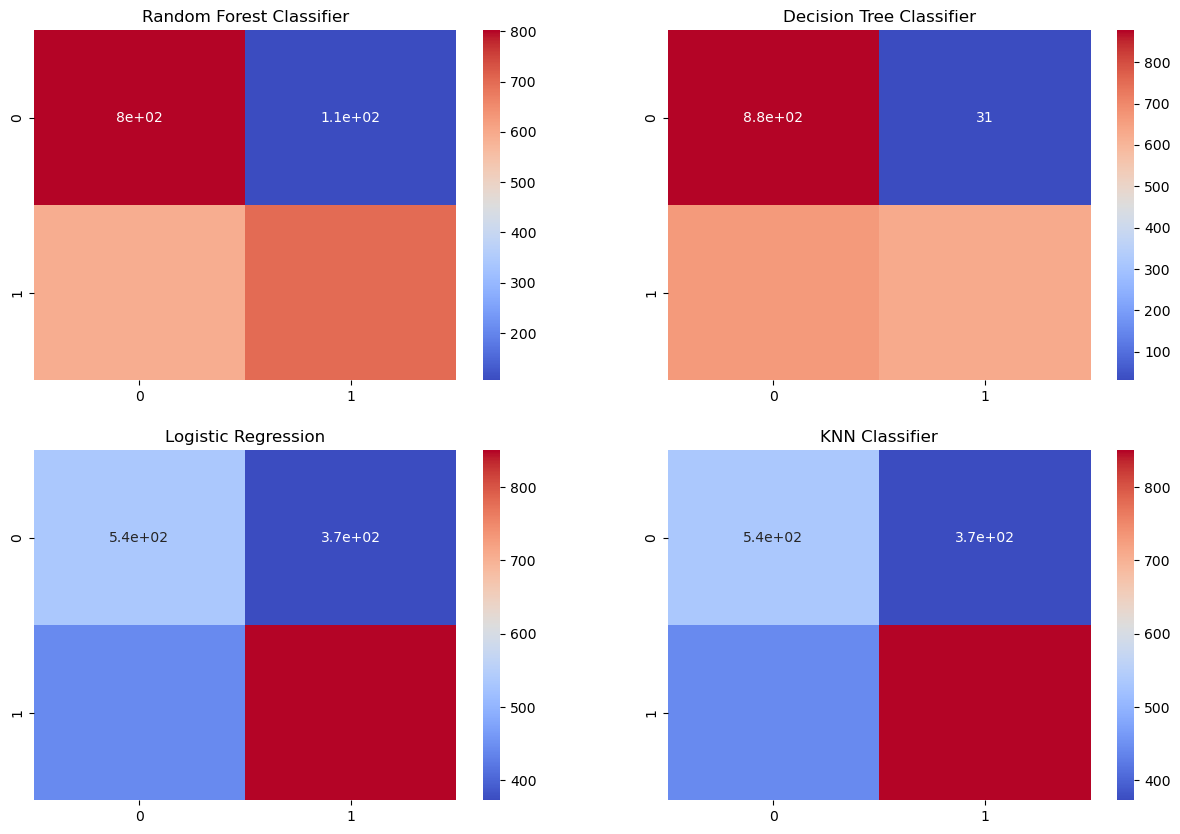

In [71]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')
plt.savefig('Confusion maatrix_output.png', dpi=200, bbox_inches='tight')
plt.show()

In [72]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.58      0.88      0.70       908
           1       0.87      0.54      0.67      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.64      1292

    accuracy                           0.68      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.79      0.68      0.67      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.59      0.57       908
           1       0.70      0.66      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      

Text(0, 0.5, 'Accuracy')

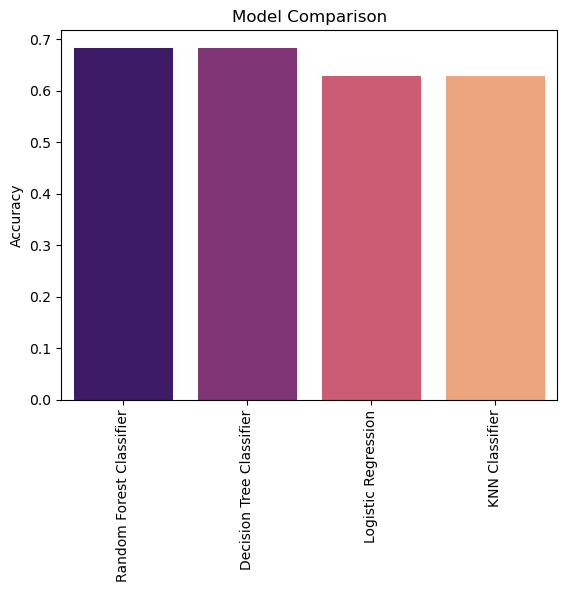

In [73]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

Model saving

In [88]:
import joblib
joblib.dump(rfc, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

#Load the model back
loaded_model = joblib.load('random_forest_model.pkl')
print("Model loaded successfully.")

Model saved as 'random_forest_model.pkl'
Model loaded successfully.
